# TUGAS BAR & PIE CHART

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker

In [3]:
df = pd.read_csv('Countries.csv')
df.head(3)

,Country Name,Capital,Population,Area (km2)
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  250 non-null    object 
 1   Capital       250 non-null    object 
 2   Population    250 non-null    int64  
 3   Area (km2)    250 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB


In [5]:
# membuat kolom baru berisi huruf pertama nama negara
df['First'] = df['Country Name'].apply(lambda x:x[0])
df.head(3)

,Country Name,Capital,Population,Area (km2),First
0,Andorra,Andorra la Vella,84000,468.0,A
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,U
2,Afghanistan,Kabul,29121286,647500.0,A


In [6]:
# mengurutkan jumlah populasi terbanyak berdasarkan huruf pertama
df_groupFirst = df.groupby('First').sum().sort_values(by='Population',ascending=False)
df_groupFirst = df_groupFirst.reset_index()
df_groupFirst.head(7)

,First,Population,Area (km2)
0,I,1616431252,8110414.00
1,C,1510896226,24354870.00
2,U,487822627,11420503.00
3,B,439030192,11261129.00
4,P,386975577,3757605.00
5,S,324540777,8376880.90
6,M,315067304,8848733.25


In [7]:
# jumlah populasi terbanyak Top 5
df_groupFirstTop = df_groupFirst.head()
df_groupFirstTop

,First,Population,Area (km2)
0,I,1616431252,8110414.0
1,C,1510896226,24354870.0
2,U,487822627,11420503.0
3,B,439030192,11261129.0
4,P,386975577,3757605.0


In [8]:
# jumlah populasi selain Top 5
otherPop = pd.DataFrame(df_groupFirst.loc[5:,:].sum()).T  # dari series jadi dataframe
otherPop.loc[0,'First'] = 'Others'  # ubah namanya 
otherPop

,First,Population,Area (km2)
0,Others,2420263021,9.10047e+07


In [9]:
# menggabungkan 2 dataframe jadi 1
df_groupFirstTop = df_groupFirstTop.append(otherPop, ignore_index=True)
df_groupFirstTop

,First,Population,Area (km2)
0,I,1616431252,8.11041e+06
1,C,1510896226,2.43549e+07
2,U,487822627,1.14205e+07
3,B,439030192,1.12611e+07
4,P,386975577,3.75760e+06
5,Others,2420263021,9.10047e+07


In [10]:
# # mengambil data categorical ('First') untuk digunakan sbg sumbu x

# listFirst = df_groupFirst.head()['First'].unique().tolist()
# listFirst.append('Other')
# listFirst

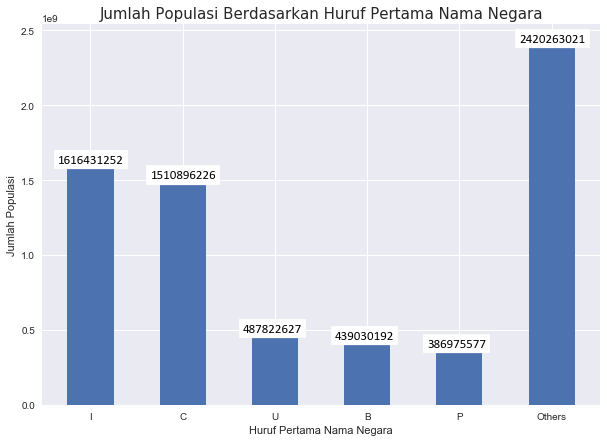

In [83]:
# membuat barplot

# membuat halaman kosong
plt.figure(figsize=(10,7))
plt.style.use('seaborn')

# barplot
barplot = plt.bar(x=df_groupFirstTop['First'], height=df_groupFirstTop['Population'], width=0.5)

# kasih keterangan di atas setiap bar
for i, j in enumerate(barplot):
    plt.text(j.get_x()-0.1, j.get_height()+70, df_groupFirstTop['Population'].iloc[i],
    fontdict={'family':'Calibri', 'size':13, 'color':'black'},
    bbox = dict(facecolor='white'))

# ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# membuat keterangan
plt.xlabel('Huruf Pertama Nama Negara')
plt.ylabel('Jumlah Populasi')
plt.title('Jumlah Populasi Berdasarkan Huruf Pertama Nama Negara', fontdict={'family':'DejaVu Sans','size':15})
plt.show()

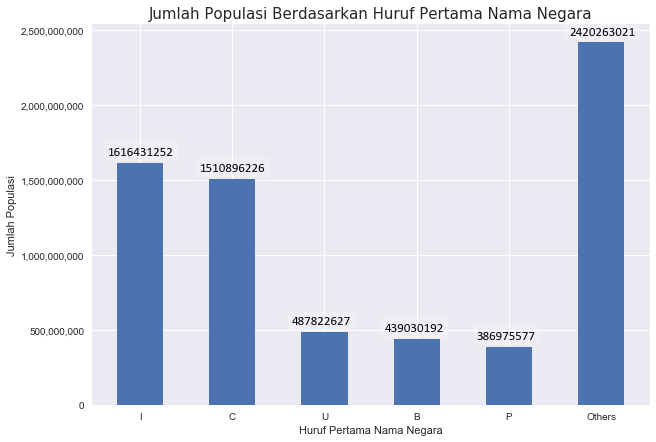

In [90]:
# cara subplot

fig, ax = plt.subplots(nrows=1, figsize=(10,7))

barplot = ax.bar(x=df_groupFirstTop['First'], height=df_groupFirstTop['Population'], width=0.5)

for i, j in enumerate(barplot):
    plt.text(j.get_x()-0.1, j.get_height()+50000000, df_groupFirstTop['Population'].iloc[i],
    fontdict={'family':'Calibri', 'size':13, 'color':'black'},
    bbox = dict(facecolor='white', alpha=0.2))

# separator ribuan
# harus pake subplot
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plt.ticklabel_format(axis='y',useOffset=False, style='plain')

plt.xlabel('Huruf Pertama Nama Negara')
plt.ylabel('Jumlah Populasi')
plt.title('Jumlah Populasi Berdasarkan Huruf Pertama Nama Negara', fontdict={'family':'DejaVu Sans','size':15})

plt.show()


In [13]:
df.head(20)

,Country Name,Capital,Population,Area (km2),First
0,Andorra,Andorra la Vella,84000,468.0,A
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,U
2,Afghanistan,Kabul,29121286,647500.0,A
3,Antigua and Barbuda,St. John's,86754,443.0,A
4,Anguilla,The Valley,13254,102.0,A
5,Albania,Tirana,2986952,28748.0,A
6,Armenia,Yerevan,2968000,29800.0,A
7,Angola,Luanda,13068161,1246700.0,A
8,Antarctica,None,0,14000000.0,A
9,Argentina,Buenos Aires,41343201,2766890.0,A


In [14]:
df_benua = pd.read_csv('Countries-Continents.csv')
df_benua.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [15]:
x = df['Country Name'].tolist()
y = df_benua['Country'].tolist()
z = df_benua['Continent'].tolist()

baru = []
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] in y:
            if x[i] == y[j]:
                baru.append(z[j])
        else:
            baru.append('None')
            break

baru
len(baru)

250

In [16]:
df['Continent'] = baru
df.head(10)

,Country Name,Capital,Population,Area (km2),First,Continent
0,Andorra,Andorra la Vella,84000,468.0,A,Europe
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,U,Asia
2,Afghanistan,Kabul,29121286,647500.0,A,Asia
3,Antigua and Barbuda,St. John's,86754,443.0,A,North America
4,Anguilla,The Valley,13254,102.0,A,None
5,Albania,Tirana,2986952,28748.0,A,Europe
6,Armenia,Yerevan,2968000,29800.0,A,Europe
7,Angola,Luanda,13068161,1246700.0,A,Africa
8,Antarctica,None,0,14000000.0,A,None
9,Argentina,Buenos Aires,41343201,2766890.0,A,South America


In [61]:
# ganti nama
continent = [i.replace('South America','America') for i in df['Continent']]

In [69]:
df['Continent'] = continent
df.head(10)
# nama sudah terubah

,Country Name,Capital,Population,Area (km2),First,Continent
0,Andorra,Andorra la Vella,84000,468.0,A,Europe
1,United Arab Emirates,Abu Dhabi,4975593,82880.0,U,Asia
2,Afghanistan,Kabul,29121286,647500.0,A,Asia
3,Antigua and Barbuda,St. John's,86754,443.0,A,America
4,Anguilla,The Valley,13254,102.0,A,None
5,Albania,Tirana,2986952,28748.0,A,Europe
6,Armenia,Yerevan,2968000,29800.0,A,Europe
7,Angola,Luanda,13068161,1246700.0,A,Africa
8,Antarctica,None,0,14000000.0,A,None
9,Argentina,Buenos Aires,41343201,2766890.0,A,America


In [70]:
# ganti nama
continent = [i.replace('North America','America') for i in df['Continent']]

In [94]:
df_GroupCont = df.groupby('Continent').sum()
df_GroupCont = df_GroupCont.reset_index()
df_GroupCont

,Continent,Population,Area (km2)
0,Africa,923880946,27128384.00
1,America,624065313,30416972.00
2,Asia,3957041863,30491110.70
3,Europe,601934186,6010469.59
4,None,720386183,47379112.10
5,Oceania,34110404,8483181.30


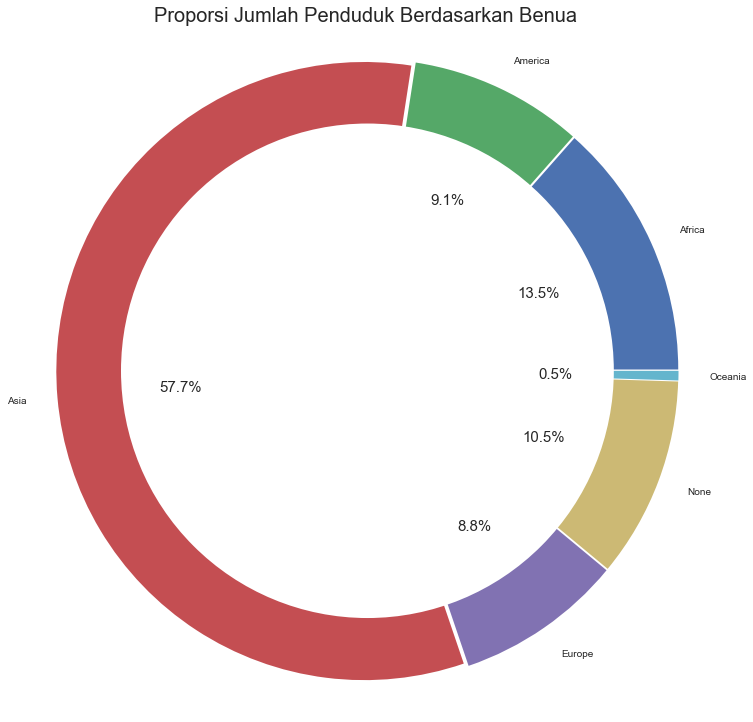

In [95]:
#  buat pie chart

plt.figure(figsize=(10,10))
plt.style.use('seaborn')

# color = ['']
explode = [0.01,0.01,0.01,0.01,0.01,0.01]
plt.pie(x=df_GroupCont['Population'], labels=df_GroupCont['Continent'], 
        shadow=False, autopct='%1.1f%%', pctdistance=0.6, startangle=0,
        explode=explode)

# buat lingkaran putih di tengah
circle = plt.Circle((0,0), 0.8, fc='white', color='black', linewidth=0)

# memasukkan lingkaran putih piechart
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.tight_layout()

# plt.legend(loc=0)
plt.rc('axes', labelsize=12)
plt.title('Proporsi Jumlah Penduduk Berdasarkan Benua', size=20)
plt.axis('equal')
plt.show()

In [22]:
df_con = pd.read_csv('country-and-continent.csv')
df_con = df_con.drop(columns=['Continent_Code','Two_Letter_Country_Code','Three_Letter_Country_Code','Country_Number'])
df_con.head()

,Continent_Name,Country_Name
0,Asia,"Afghanistan, Islamic Republic of"
1,Europe,"Albania, Republic of"
2,Antarctica,Antarctica (the territory South of 60 deg S)
3,Africa,"Algeria, People's Democratic Republic of"
4,Oceania,American Samoa


In [23]:
new = df_con['Country_Name'].str.split(',', n=1, expand=True)
new.head()

,0,1
0,Afghanistan,Islamic Republic of
1,Albania,Republic of
2,Antarctica (the territory South of 60 deg S),None
3,Algeria,People's Democratic Republic of
4,American Samoa,None


In [24]:
df_con['FirstName'] = new[0]
df_con['LastName'] = new[1]

df_con.head()

,Continent_Name,Country_Name,FirstName,LastName
0,Asia,"Afghanistan, Islamic Republic of",Afghanistan,Islamic Republic of
1,Europe,"Albania, Republic of",Albania,Republic of
2,Antarctica,Antarctica (the territory South of 60 deg S),Antarctica (the territory South of 60 deg S),None
3,Africa,"Algeria, People's Democratic Republic of",Algeria,People's Democratic Republic of
4,Oceania,American Samoa,American Samoa,None


In [25]:
# mengubah series menjadi list


list_Country = df['Country Name'].tolist() # x
list_FirstName = df_con['FirstName'].tolist() # y
list_Continent_Name = df_con['Continent_Name'].tolist() # z


In [26]:
x = [12,18,11]
y = [11,12,12,13,14,15]
z = ['a','b','c','c','d','e']

baru = []
for i in range(len(x)):
    for j in range(len(y)):
        if x[i] in y:
            if x[i] == y[j]:
                baru.append(z[j])
        else:
            baru.append('None')
            break

baru

['b', 'c', 'None', 'a']

In [27]:
y = list(tuple(y))
y   

[11, 12, 12, 13, 14, 15]

In [28]:
# membuat list berisi kotinen untuk ditaro di df

listCont = []

for i in range(len(list_Country)):
    for j in range(len(list_FirstName)):

        if list_Country[i] in list_FirstName:
            if list_Country[i] == list_FirstName[j]:
                listCont.append(list_Continent_Name[j])
        else:
            listCont.append('None')
            break
  
# listCont
# len(listCont)

In [29]:
# df['Continent Name'] = listCont